In [2]:
import sys
sys.path.append('../src')

In [3]:
from imports.TactileBag import TactileBag

tbag = TactileBag('../data/bags/lowlight1//')
tbag.params

{'path': '/home/hussain/tactile/data/bags/lowlight',
 'possible_angles': [0.0174532925,
  0.034906585,
  0.0523598776,
  0.075,
  0.095,
  0.115,
  0.135,
  0.15],
 'N_examples': 20,
 'theta': 'full',
 'N_iters': 12,
 'z_thresh': -0.01,
 'min_z': -0.015,
 'max_z': 0.035,
 'led': 0,
 'bg_filter': 80}

In [3]:
df = tbag.parsed_bag
df

,ts,contact_status,contact_case,contact_angle_x,contact_angle_y,contact_angle_z
0,1672235485049392995,False,0.0,0.001636,0.000830,0.002355
1,1672235485086052833,False,0.0,0.001678,0.000865,0.002270
2,1672235485103664372,False,0.0,0.001699,0.000899,0.002283
3,1672235485131136692,False,0.0,0.001646,0.000848,0.002319
4,1672235485148841329,False,0.0,0.001657,0.000877,0.002295
...,...,...,...,...,...,...
508727,1672246958274827871,False,0.0,0.176380,0.000774,0.002480
508728,1672246958290677711,False,0.0,0.176479,0.000865,0.002503
508729,1672246958303181902,False,0.0,0.176448,0.000805,0.002490
508730,1672246958333194754,False,0.0,0.176357,0.000800,0.002475


In [4]:
import pandas as pd

img_ts = pd.read_csv('/media/hussain/28E9086A116E859E/auto_reconstruction/timestamps.txt', names=['ts'])['ts'].values*1e9
img_ts

array([1.67463960e+18, 1.67463960e+18, 1.67463960e+18, ...,
       1.67464881e+18, 1.67464881e+18, 1.67464881e+18])

(array([  45., 2083., 6106., 6498., 2172., 2283., 1062., 1325.,  991.,
          15.]),
 array([0.13104614, 0.20185764, 0.27266913, 0.34348063, 0.41429212,
        0.48510362, 0.55591511, 0.6267266 , 0.6975381 , 0.76834959,
        0.83916109]),
 <BarContainer object of 10 artists>)

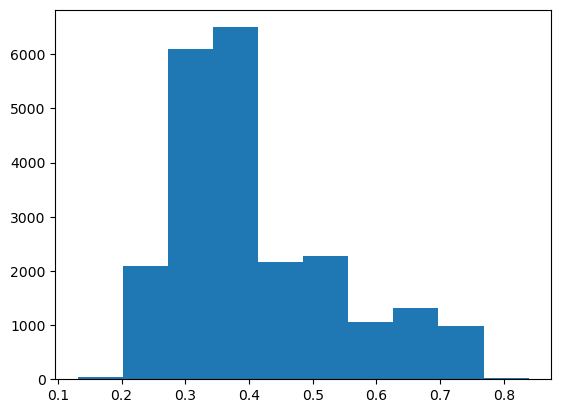

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.diff(img_ts)*1e-9)

In [6]:
from pathlib import Path

imgs = sorted(Path('/media/hussain/28E9086A116E859E/auto_reconstruction/').glob('frame_*.png'))

In [8]:
from imports.ExtractContactCases import ExtractContactCases

ex = ExtractContactCases('../data/bags/lowlight1/', '../data')
ex.parse_bag()

extracting contact timestamps:   0%|          | 0/363692 [00:00<?, ?it/s]

In [8]:
with open('cases', 'w') as f:
    f.write(str(ex.cases_ts))

In [9]:
len(ex.cases)

1836

In [10]:
ex.circle_rad, ex.center

(85, (180, 117))

In [11]:
117+85

202

In [12]:
import numpy as np
img_idx = []
for case_ts in ex.cases_ts:
    img_ts_idx = np.searchsorted(img_ts, case_ts[0])
    img_idx.append(img_ts_idx)

In [13]:
img_idx

[12,
 24,
 36,
 48,
 60,
 72,
 85,
 97,
 110,
 122,
 135,
 147,
 159,
 171,
 183,
 195,
 207,
 219,
 232,
 244,
 256,
 268,
 281,
 293,
 305,
 316,
 329,
 340,
 353,
 364,
 376,
 388,
 401,
 413,
 425,
 437,
 448,
 461,
 472,
 485,
 497,
 509,
 522,
 534,
 546,
 558,
 571,
 582,
 595,
 606,
 618,
 630,
 642,
 654,
 666,
 678,
 690,
 702,
 714,
 726,
 737,
 750,
 762,
 773,
 786,
 798,
 810,
 823,
 835,
 847,
 859,
 871,
 883,
 894,
 907,
 919,
 931,
 943,
 956,
 968,
 980,
 993,
 1005,
 1018,
 1030,
 1043,
 1055,
 1067,
 1079,
 1092,
 1105,
 1116,
 1128,
 1140,
 1152,
 1165,
 1177,
 1189,
 1200,
 1213,
 1226,
 1237,
 1249,
 1262,
 1273,
 1285,
 1298,
 1309,
 1323,
 1334,
 1346,
 1358,
 1370,
 1382,
 1394,
 1405,
 1417,
 1428,
 1441,
 1452,
 1464,
 1477,
 1489,
 1501,
 1512,
 1525,
 1537,
 1549,
 1562,
 1574,
 1586,
 1597,
 1609,
 1620,
 1633,
 1646,
 1657,
 1669,
 1680,
 1693,
 1705,
 1717,
 1729,
 1742,
 1754,
 1766,
 1779,
 1791,
 1804,
 1815,
 1828,
 1839,
 1852,
 1864,
 1876,
 1888

135


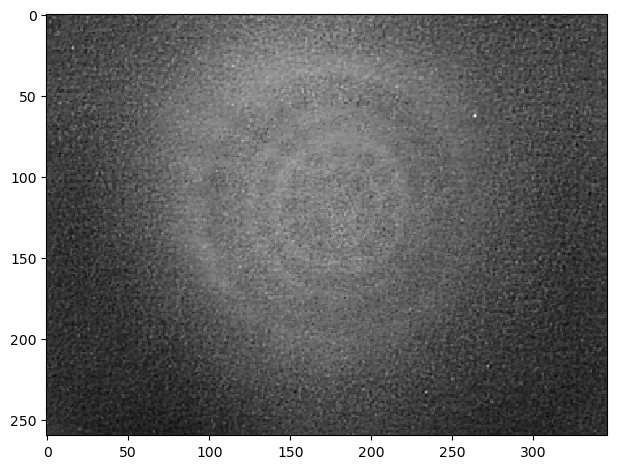

In [16]:
print(img_idx[10])
from skimage.io import imread, imshow
imshow(imread(imgs[32]))

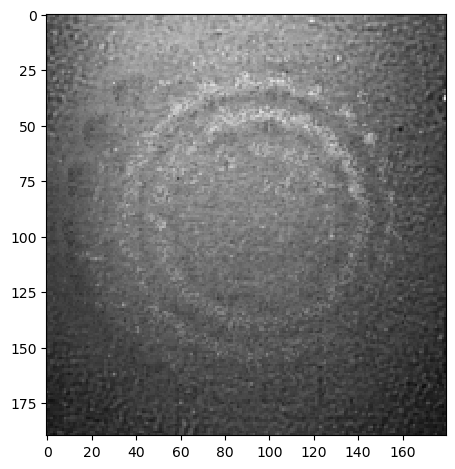

In [18]:
from skimage.io import imread, imshow

img = imread(imgs[img_idx[20]])
imshow(img[25:215, 85:265])

In [20]:
import pandas as pd
from pathlib import Path

all = pd.DataFrame({
    'img': [Path(imgs[i]).parts[-1] for i in img_idx],
    'rx': [ex.cases_dict[c][0] for c in ex.cases],
    'ry': [ex.cases_dict[c][1] for c in ex.cases]
})
all

,img,rx,ry
0,frame_0000409305.png,0.00,0.000000e+00
1,frame_0000787125.png,0.00,0.000000e+00
2,frame_0001164945.png,0.00,0.000000e+00
3,frame_0001542765.png,0.00,0.000000e+00
4,frame_0001920585.png,0.00,0.000000e+00
...,...,...,...
1831,frame_0708381015.png,0.15,-3.673940e-17
1832,frame_0708790320.png,0.15,-3.673940e-17
1833,frame_0709168140.png,0.15,-3.673940e-17
1834,frame_0709545960.png,0.15,-3.673940e-17


In [24]:
all.to_csv('lowlight_e2vid.csv', index=False)

In [21]:
img, rx, ry = all.iloc[3]
rx

0.0

In [22]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(all.index, train_size=0.75)

In [23]:
Path(imgs[0]).parts[-1]

'frame_0000031485.png'

In [27]:
all.iloc[test_idx].to_csv('lowlight_e2vid_test', index=False)

In [2]:
import pandas as pd

pd.read_csv('dataset/test.csv')

,img,rx,ry
0,frame_0141808440.png,0.025707,-1.015154e-01
1,frame_0084946530.png,-0.051646,8.618153e-03
2,frame_0068511360.png,-0.070925,7.704483e-02
3,frame_0178897770.png,0.052360,-1.282447e-17
4,frame_0054469050.png,-0.021033,4.794978e-02
...,...,...,...
568,frame_0050061150.png,-0.011530,1.391494e-01
569,frame_0142532595.png,0.029992,-1.184346e-01
570,frame_0001542765.png,0.016508,5.667075e-03
571,frame_0171750675.png,0.099046,-3.400245e-02
